# Assignment 6: Apply NB

<ol>
    <li>Minimum data points need to be considered for people having 4GB RAM is <strong>50k</strong> and for 8GB RAM is <strong>100k</strong></li>
    <li>When you are using ramdomsearchcv or gridsearchcv you need not split the data into X_train,X_cv,X_test. As the above methods use kfold. The model will learn better if train data is more so splitting to X_train,X_test will suffice.</li>
    <li>If you are writing for loops to tune your model then you need split the data into X_train,X_cv,X_test.</li>
    <li>While splitting the data explore stratify parameter. </li>
    <li><strong>Apply Multinomial NB on these feature sets</strong></li>
        <ul>
            <li>Features that need to be considered</li> 
                <dl>
                  <dt>essay</dt>
                    <dd>while encoding essay, try to experiment with the max_features and n_grams parameter of vectorizers and see if it increases AUC score.</dd>
                  <dt>categorical features</dt>
                  <dd> - teacher_prefix</dd>
                  <dd> - project_grade_category</dd>
                  <dd> - school_state</dd>
                  <dd> - clean_categories</dd>
                  <dd> - clean_subcategories</dd>
                  <dt>numerical features</dt>
                  <dd> - price</dd>
                  <dd> - teacher_number_of_previously_posted_projects</dd>
                  <dd>while encoding the numerical features check <a href='https://imgur.com/ldZA1zg'>this</a> and <a href='https://ac-classroom-production.s3.amazonaws.com/public/COMMENT/Annotation_2020-05-21_225912_0lyZzN8.jpg'>this</a></dd>
                </dl>    
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Consider alpha values in range: 10^-5 to 10^2 like [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]</li>
    <li>Explore class_prior = [0.5, 0.5] parameter which can be present in MultinomialNB function(go through <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>this</a> ) then check how results might change.
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>For hyper parameter tuning using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px><dd>-while plotting take log(alpha) on your X-axis so that it will be more readable</dd></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://imgur.com/q2P65L5.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
        <img src='https://i.imgur.com/IdN5Ctv.png' width=300px><dd>-plot the confusion matrix in heatmaps, while plotting the confusion matrix go through the <a href='https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor'>link </a>
</dd></li>
        </ul>
<li>find the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print <strong>BOTH</strong> positive as well as negative corresponding feature names. <dd> - go through the <a href='https://imgur.com/mWvE7gj'>link </a> </dd>
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [ ]:
#make sure you are loading atleast 50k datapoints
#you can work with features of preprocessed_data.csv for the assignment.
# If you want to add more features, you can add. (This is purely optional, not mandatory)

import pandas
data = pandas.read_csv('preprocessed_data.csv')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re
import pickle
from tqdm import tqdm
import os

import plotly.graph_objs as go
from collections import Counter

In [ ]:
import pandas as pd
data  = pd.read_csv('preprocessed_data.csv', nrows=50000)
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [ ]:
# write your code in following steps for task 1
# 1. Split your data.
# 2. Perform Bag of Words Vectorization of text data.
# 3. Perform tfidf vectorization of text data.
# 4. perform one-hot encoding of categorical features.
# 5. perform normalization of numerical features
# 6. For set 1 stack up all the features using hstack()
# 7. For set 2 stack up all the features using hstack()
# 8. Perform hyperparameter tuning and represent the training and cross-validation AUC scores for different 'alpha' values, using a 2D line plot.
# 9. Find the best hyperparameter 'alpha' and fit the model. Plot ROC-AUC curve(by obtaining the probabilities using 'predict proba' method)
# 10. Plot confusion matrix based on the best threshold value
# 11. Either for the model in set 1 or in set 2, print the top 20 features(you have to print the names, not the indexes) associated with the positive and negative classes each.
# 12. Summarize your observations and compare both the models(ie., from set 1 and set 2) in terms of optimal hyperparameter value, train AUC and test AUC scores. 
# 13. You can use Prettytable or any other tabular format for comparison.


# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    

In [ ]:
# Split the dataset 
# 1) If you want to apply simple cross-validation, split the dataset into 3 parts (ie., train, CV and test sets)
# 2) If you want to apply K-fold CV (or) GridSearch Cross Validation (or) Randomized Search Cross Validation, just split the dataset into 2 parts (ie., train and test sets)



In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

print(X_train.shape , y_train.shape)
print(X_test.shape, y_test.shape)
print('**'*50)

(33500, 8) (33500,)
(16500, 8) (16500,)
****************************************************************************************************


<h2>1.3 Make Data Model Ready: encoding essay, and project_title</h2>

In [ ]:
# Apply Bag of Words (BOW) vectorization on 'Preprocessed_Essay' 
# Apply Bag of Words (BOW) vectorization on 'Preprocessed_Title' (Optional)


In [ ]:
# Apply TF-IDF vectorization on 'Preprocessed_Essay' 
# Apply TF-IDF vectorization on 'Preprocessed_Title' (Optional)


In [ ]:
# encoding essay attribute using count vectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['essay'].values)
essay_feature_bow=vectorizer.get_feature_names()
X_train_essay_bow=vectorizer.transform(X_train['essay'].values)
X_test_essay_bow=vectorizer.transform(X_test['essay'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_essay_bow.shape,y_train.shape)
print("test feature --",X_test_essay_bow.shape,y_test.shape)
# print('the features are : ',essay_feature_bow)
print('**'*50)

# encoding school_state using count vectorizer
vectorizer=CountVectorizer()
vectorizer.fit(X_train['school_state'].values)
school_state_feature_bow=vectorizer.get_feature_names()
X_train_school_state_bow=vectorizer.transform(X_train['school_state'].values)
X_test_school_state_bow=vectorizer.transform(X_test['school_state'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_school_state_bow.shape,y_train.shape)
print("test feature --",X_test_school_state_bow.shape,y_test.shape)
print('the features are : ',school_state_feature_bow)
print('**'*50)
#encoding teacher_prefix using count vectorizer
vectorizer=CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values)
teacher_prefix_feature_bow=vectorizer.get_feature_names()
X_train_teacher_prefix_bow=vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teacher_prefix_bow=vectorizer.transform(X_test['teacher_prefix'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_teacher_prefix_bow.shape,y_train.shape)
print("test feature --",X_test_teacher_prefix_bow.shape,y_test.shape)
print('the features are : ',teacher_prefix_feature_bow)
print('**'*50)

#encoding project_grade_category using count vectorizer
vectorizer=CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values)
project_grade_category_feature_bow=vectorizer.get_feature_names()
X_train_project_grade_category_bow=vectorizer.transform(X_train['project_grade_category'].values)
X_test_project_grade_category_bow=vectorizer.transform(X_test['project_grade_category'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_project_grade_category_bow.shape,y_train.shape)
print("test feature --",X_test_project_grade_category_bow.shape,y_test.shape)
print('the features are : ',project_grade_category_feature_bow)
print('**'*50)

#encoding clean_categories using count vectorizer
vectorizer=CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values)
clean_categories_feature_bow=vectorizer.get_feature_names()
X_train_clean_categories_bow=vectorizer.transform(X_train['clean_categories'].values)
X_test_clean_categories_bow=vectorizer.transform(X_test['clean_categories'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_clean_categories_bow.shape,y_train.shape)
print("test feature --",X_test_clean_categories_bow.shape,y_test.shape)
print('the features are : ',clean_categories_feature_bow)
print('**'*50)

#encoding clean_subcategories using count vectorizer
vectorizer=CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values)
clean_subcategories_feature_bow=vectorizer.get_feature_names()
X_train_clean_subcategories_bow=vectorizer.transform(X_train['clean_subcategories'].values)
X_test_clean_subcategories_bow=vectorizer.transform(X_test['clean_subcategories'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_clean_subcategories_bow.shape,y_train.shape)
print("test feature --",X_test_clean_subcategories_bow.shape,y_test.shape)
print('the features are : ',clean_subcategories_feature_bow)
print('**'*50)

 after encoding in bow the size of :
 train feature -- (33500, 5000) (33500,)
test feature -- (16500, 5000) (16500,)
****************************************************************************************************
 after encoding in bow the size of :
 train feature -- (33500, 51) (33500,)
test feature -- (16500, 51) (16500,)
the features are :  ['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
****************************************************************************************************
 after encoding in bow the size of :
 train feature -- (33500, 5) (33500,)
test feature -- (16500, 5) (16500,)
the features are :  ['dr', 'mr', 'mrs', 'ms', 'teacher']
*************************************************************************

In [ ]:
# encoding essay attribute using count vectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['essay'].values)
essay_feature_TF=vectorizer.get_feature_names()
X_train_essay_TF=vectorizer.transform(X_train['essay'].values)
X_test_essay_TF=vectorizer.transform(X_test['essay'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_essay_TF.shape,y_train.shape)
print("test feature --",X_test_essay_TF.shape,y_test.shape)
# print('the features are : ',essay_feature_bow)
print('**'*50)

# encoding school_state using count vectorizer
vectorizer=TfidfVectorizer()
vectorizer.fit(X_train['school_state'].values)
school_state_feature_TF=vectorizer.get_feature_names()
X_train_school_state_TF=vectorizer.transform(X_train['school_state'].values)
X_test_school_state_TF=vectorizer.transform(X_test['school_state'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_school_state_TF.shape,y_train.shape)
print("test feature --",X_test_school_state_TF.shape,y_test.shape)
print('the features are : ',school_state_feature_TF)
print('**'*50)

#encoding teacher_prefix using count vectorizer
vectorizer=TfidfVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values)
teacher_prefix_feature_TF=vectorizer.get_feature_names()
X_train_teacher_prefix_TF=vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teacher_prefix_TF=vectorizer.transform(X_test['teacher_prefix'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_teacher_prefix_TF.shape,y_train.shape)
print("test feature --",X_test_teacher_prefix_TF.shape,y_test.shape)
print('the features are : ',teacher_prefix_feature_TF)
print('**'*50)

#encoding project_grade_category using count vectorizer
vectorizer=TfidfVectorizer()
vectorizer.fit(X_train['project_grade_category'].values)
project_grade_category_feature_TF=vectorizer.get_feature_names()
X_train_project_grade_category_TF=vectorizer.transform(X_train['project_grade_category'].values)
X_test_project_grade_category_TF=vectorizer.transform(X_test['project_grade_category'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_project_grade_category_TF.shape,y_train.shape)
print("test feature --",X_test_project_grade_category_TF.shape,y_test.shape)
print('the features are : ',project_grade_category_feature_TF)
print('**'*50)

#encoding clean_categories using count vectorizer
vectorizer=TfidfVectorizer()
vectorizer.fit(X_train['clean_categories'].values)
clean_categories_feature_TF=vectorizer.get_feature_names()
X_train_clean_categories_TF=vectorizer.transform(X_train['clean_categories'].values)
X_test_clean_categories_TF=vectorizer.transform(X_test['clean_categories'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_clean_categories_TF.shape,y_train.shape)
print("test feature --",X_test_clean_categories_TF.shape,y_test.shape)
print('the features are : ',clean_categories_feature_TF)

#encoding clean_subcategories using count vectorizer
vectorizer=TfidfVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values)
clean_subcategories_feature_TF=vectorizer.get_feature_names()
X_train_clean_subcategories_TF=vectorizer.transform(X_train['clean_subcategories'].values)
X_test_clean_subcategories_TF=vectorizer.transform(X_test['clean_subcategories'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_clean_subcategories_TF.shape,y_train.shape)
print("test feature --",X_test_clean_subcategories_TF.shape,y_test.shape)
print('the features are : ',clean_subcategories_feature_TF)
print('**'*50)

 after encoding in bow the size of :
 train feature -- (33500, 5000) (33500,)
test feature -- (16500, 5000) (16500,)
****************************************************************************************************
 after encoding in bow the size of :
 train feature -- (33500, 51) (33500,)
test feature -- (16500, 51) (16500,)
the features are :  ['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
****************************************************************************************************
 after encoding in bow the size of :
 train feature -- (33500, 5) (33500,)
test feature -- (16500, 5) (16500,)
the features are :  ['dr', 'mr', 'mrs', 'ms', 'teacher']
*************************************************************************

<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [ ]:
# Apply One-Hot Encoding on the categorical features either using OneHotEncoder() (or) CountVectorizer(binary=True)
# Apply Normalization on the numerical features using Normalizer().


In [ ]:
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(-1,1))
X_train_price_norm=normalizer.transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm=normalizer.transform(X_test['price'].values.reshape(-1,1))

print(" after encoding using normalizer the size of :")
print(" train feature --",X_train_price_norm.shape,y_train.shape)
print("test feature --",X_test_price_norm.shape,y_test.shape)
print('**'*50)


normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_train_teacher_number_of_previously_posted_projects_norm=normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_teacher_number_of_previously_posted_projects_norm=normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print(" after encoding using normalizer the size of :")
print(" train feature --",X_train_teacher_number_of_previously_posted_projects_norm.shape,y_train.shape)
print("test feature --",X_test_teacher_number_of_previously_posted_projects_norm.shape,y_test.shape)
print('**'*50)

 after encoding using normalizer the size of :
 train feature -- (33500, 1) (33500,)
test feature -- (16500, 1) (16500,)
****************************************************************************************************
 after encoding using normalizer the size of :
 train feature -- (33500, 1) (33500,)
test feature -- (16500, 1) (16500,)
****************************************************************************************************


In [ ]:
# merge two sparse matrices
from scipy.sparse import hstack
X_train_BOW = hstack((X_train_essay_bow, X_train_school_state_bow, X_train_teacher_prefix_bow, X_train_project_grade_category_bow,X_train_clean_categories_bow,X_train_clean_subcategories_bow, X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_test_BOW = hstack((X_test_essay_bow, X_test_school_state_bow, X_test_teacher_prefix_bow, X_test_project_grade_category_bow,X_test_clean_categories_bow,X_test_clean_subcategories_bow, X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm)).tocsr()

print(X_train_BOW.shape, y_train.shape)
print(X_test_BOW.shape, y_test.shape)
print('**'*50)

X_train_TFIDF = hstack((X_train_essay_TF, X_train_school_state_TF, X_train_teacher_prefix_TF, X_train_project_grade_category_TF,X_train_clean_categories_TF,X_train_clean_subcategories_TF, X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_test_TFIDF = hstack((X_test_essay_TF, X_test_school_state_TF, X_test_teacher_prefix_TF, X_test_project_grade_category_TF,X_test_clean_categories_TF,X_test_clean_subcategories_TF, X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm)).tocsr()

print(X_train_TFIDF.shape, y_train.shape)
print(X_test_TFIDF.shape, y_test.shape)
print('**'*50)

(33500, 5101) (33500,)
(16500, 5101) (16500,)
****************************************************************************************************
(33500, 5101) (33500,)
(16500, 5101) (16500,)
****************************************************************************************************


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

#### Set 1

In [ ]:
# Perform Hyperparameter Tuning.
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot



In [ ]:
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,
# Note: If you have split the datase into 3 parts (ie., train, cv and test sets) in the beginning, then the training datafor this final model would be (train set + cv set)
# Make class label and probability predictions on the train and test data.


In [ ]:
# Plot the ROC-AUC curves using the probability predictions made on train and test data.


In [ ]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.


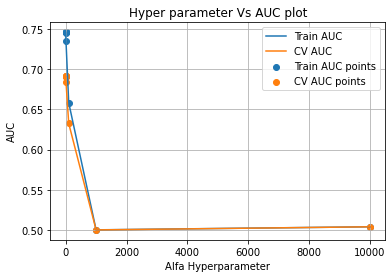

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.073863,0.002605,0.015753,0.000343,0.0001,{'alpha': 0.0001},0.705612,0.705104,0.685337,0.686083,0.672447,0.690917,0.012750,4,0.742505,0.746049,0.746650,0.747622,0.746332,0.745831,0.001746
1,0.067336,0.008094,0.015786,0.000283,0.001,{'alpha': 0.001},0.705851,0.705102,0.685337,0.686083,0.672446,0.690964,0.012805,3,0.742503,0.746048,0.746649,0.747621,0.746331,0.745830,0.001746
2,0.073302,0.005715,0.015485,0.000197,0.01,{'alpha': 0.01},0.706082,0.705093,0.685332,0.686082,0.672440,0.691006,0.012860,1,0.742492,0.746037,0.746638,0.747610,0.746322,0.745820,0.001746
3,0.068600,0.000470,0.016280,0.000656,0.1,{'alpha': 0.1},0.706256,0.705058,0.685274,0.686039,0.672367,0.690999,0.012922,2,0.742392,0.745933,0.746547,0.747512,0.746225,0.745722,0.001748
4,0.067221,0.001313,0.016068,0.000454,1,{'alpha': 1},0.705932,0.704509,0.684600,0.685672,0.671685,0.690480,0.013012,5,0.741445,0.744885,0.745612,0.746532,0.745292,0.744753,0.001741
5,0.067307,0.003456,0.017195,0.002620,10,{'alpha': 10},0.700676,0.698977,0.677529,0.681020,0.664751,0.684591,0.013579,6,0.732033,0.734657,0.736252,0.736956,0.736075,0.735194,0.001748
6,0.066105,0.003337,0.015405,0.000183,100,{'alpha': 100},0.644935,0.647172,0.628988,0.627787,0.613775,0.632531,0.012289,7,0.654892,0.654111,0.659475,0.661105,0.662134,0.658343,0.003259
7,0.069046,0.005718,0.014758,0.000153,1000,{'alpha': 1000},0.500288,0.501309,0.499733,0.499911,0.499733,0.500195,0.000593,9,0.500405,0.499939,0.500427,0.500244,0.500383,0.500279,0.000182
8,0.066188,0.010128,0.013159,0.002383,10000,{'alpha': 10000},0.504177,0.505294,0.502177,0.505953,0.502796,0.504079,0.001433,8,0.504309,0.503753,0.504648,0.503513,0.504166,0.504077,0.000403


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

model = MultinomialNB()
parameters = {'alpha':[0.0001, 0.001, 0.01, 0.1,1,10,100,1000,10000]}   # values changed to interval(10^[-4] to 10^4) as suggested
clf = GridSearchCV(model, parameters, cv=5, scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf.fit(X_train_BOW, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
K =  results['param_alpha']

plt.plot(K, train_auc, label='Train AUC')

plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Alfa Hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results

In [ ]:
print(clf.best_estimator_)
best_alpha_bow = clf.best_estimator_.alpha
print('the best value of hyper-parameter alpha by Gridsearch on BOW Vectorization is :- ',best_alpha_bow)

MultinomialNB(alpha=0.01)
the best value of hyper-parameter alpha by Gridsearch on BOW Vectorization is :-  0.01


#### Set 2

In [ ]:
# Perform Hyperparameter Tuning.
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot



In [ ]:
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,
# Note: If you have split the datase into 3 parts (ie., train, cv and test sets) in the beginning, then the training datafor this final model would be (train set + cv set)
# Make class label and probability predictions on the train and test data.


In [ ]:
# Plot the ROC-AUC curves using the probability predictions made on train and test data.


In [ ]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.


In [ ]:
# Either from set 1 (or) set 2, print the names of the top 20 features associated with the positive and negative classes each. (You have to print the names of the features, but not the indexes)



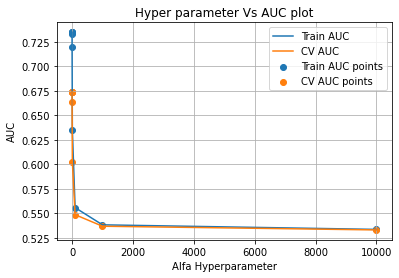

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.077573,0.004290,0.017182,0.002144,0.0001,{'alpha': 0.0001},0.686815,0.683386,0.667509,0.667219,0.666085,0.674203,0.008977,1,0.732558,0.735116,0.733332,0.736676,0.735790,0.734694,0.001531
1,0.073667,0.004158,0.016548,0.001546,0.001,{'alpha': 0.001},0.686805,0.683379,0.667498,0.667209,0.666074,0.674193,0.008977,2,0.732544,0.735100,0.733317,0.736662,0.735776,0.734680,0.001531
2,0.066626,0.001714,0.017236,0.002839,0.01,{'alpha': 0.01},0.686712,0.683295,0.667396,0.667123,0.665997,0.674105,0.008976,3,0.732413,0.734946,0.733179,0.736519,0.735642,0.734540,0.001528
3,0.071830,0.003871,0.017382,0.002215,0.1,{'alpha': 0.1},0.686798,0.682539,0.666281,0.666300,0.665007,0.673385,0.009323,4,0.731087,0.733441,0.731791,0.735084,0.734309,0.733142,0.001501
4,0.068595,0.001754,0.016915,0.001646,1,{'alpha': 1},0.678352,0.674048,0.655380,0.657348,0.655009,0.664027,0.010063,5,0.717765,0.719076,0.718388,0.721351,0.721080,0.719532,0.001438
5,0.068625,0.001911,0.016984,0.002609,10,{'alpha': 10},0.621823,0.613461,0.592347,0.596502,0.589971,0.602821,0.012562,6,0.631558,0.633088,0.637021,0.637331,0.638332,0.635466,0.002647
6,0.067216,0.001249,0.015736,0.000167,100,{'alpha': 100},0.574255,0.563897,0.539913,0.531684,0.533680,0.548686,0.017183,7,0.549240,0.552481,0.558447,0.560235,0.558938,0.555868,0.004256
7,0.066577,0.001615,0.015507,0.000147,1000,{'alpha': 1000},0.562509,0.553447,0.529006,0.514731,0.524860,0.536911,0.018046,8,0.531829,0.534500,0.540446,0.543932,0.540911,0.538324,0.004460
8,0.069811,0.002593,0.015450,0.000564,10000,{'alpha': 10000},0.552738,0.549189,0.527275,0.513066,0.523449,0.533143,0.015316,9,0.528675,0.529734,0.535244,0.538747,0.535909,0.533662,0.003840


In [ ]:
model = MultinomialNB()
parameters = {'alpha':[0.0001, 0.001, 0.01, 0.1,1,10,100,1000,10000]}  # values changed to interval(10^[-4] to 10^4) as suggested
clf = GridSearchCV(model, parameters, cv=5, scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf.fit(X_train_TFIDF, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
K =  results['param_alpha']

plt.plot(K, train_auc, label='Train AUC')

plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Alfa Hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results

In [ ]:
print(clf.best_estimator_)
best_alpha_tfidf = clf.best_estimator_.alpha
print('the best value of hyper-parameter alpha by Gridsearch on TFIDF Vectorization is :- ',best_alpha_tfidf)

MultinomialNB(alpha=0.0001)
the best value of hyper-parameter alpha by Gridsearch on TFIDF Vectorization is :-  0.0001


In [ ]:
def batch_predict(clf, data):

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])   
    return y_data_pred

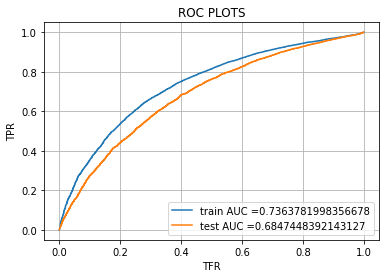

In [ ]:
from sklearn.metrics import roc_curve, auc

model = MultinomialNB(alpha=best_alpha_bow)
model.fit(X_train_BOW, y_train)

y_train_pred_BOW = batch_predict(model, X_train_BOW)    
y_test_pred_BOW = batch_predict(model, X_test_BOW)

train_fpr_BOW, train_tpr_BOW, train_thresholds_BOW = roc_curve(y_train, y_train_pred_BOW)
test_fpr_BOW, test_tpr_BOW, test_thresholds_BOW = roc_curve(y_test, y_test_pred_BOW)

plt.plot(train_fpr_BOW, train_tpr_BOW, label="train AUC ="+str(auc(train_fpr_BOW, train_tpr_BOW)))
plt.plot(test_fpr_BOW, test_tpr_BOW, label="test AUC ="+str(auc(test_fpr_BOW, test_tpr_BOW)))
AUC_BOW=auc(test_fpr_BOW, test_tpr_BOW)
plt.legend()
plt.xlabel("TFR")
plt.ylabel("TPR")
plt.title("ROC PLOTS")
plt.grid()
plt.show()

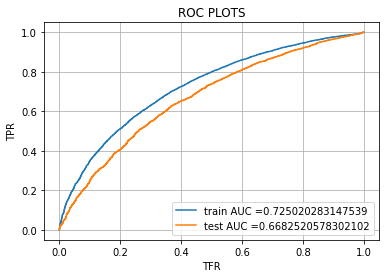

In [ ]:
from sklearn.metrics import roc_curve, auc

model = MultinomialNB(alpha=best_alpha_tfidf)
model.fit(X_train_TFIDF, y_train)

y_train_pred_TFIDF = batch_predict(model, X_train_TFIDF)    
y_test_pred_TFIDF = batch_predict(model, X_test_TFIDF)

train_fpr_TFIDF, train_tpr_TFIDF, train_thresholds_TFIDF = roc_curve(y_train, y_train_pred_TFIDF)
test_fpr_TFIDF, test_tpr_TFIDF, test_thresholds_TFIDF = roc_curve(y_test, y_test_pred_TFIDF)

plt.plot(train_fpr_TFIDF, train_tpr_TFIDF, label="train AUC ="+str(auc(train_fpr_TFIDF, train_tpr_TFIDF)))
plt.plot(test_fpr_TFIDF, test_tpr_TFIDF, label="test AUC ="+str(auc(test_fpr_TFIDF, test_tpr_TFIDF)))
AUC_TFIDF=auc(test_fpr_TFIDF, test_tpr_TFIDF)     
plt.legend()
plt.xlabel("TFR")
plt.ylabel("TPR")
plt.title("ROC PLOTS")
plt.grid()
plt.show()

In [ ]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [ ]:
def plot_CF_MAT(X):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import pandas as pd
    
    df = pd.DataFrame(X, index = [0,1],columns = [0,1])
    print(df)
    print('\n')
    sns.cubehelix_palette(8)
    sns.set(font_scale=1.5)
    df.index.name = 'Actual'
    df.columns.name = 'Predicted'
    labels =  np.array([[{'TN':X[0][0]},{'FP':X[0][1]}],[{'FN':X[1][0]},{'TP':X[1][1]}]])
    fig, ax = plt.subplots()
    ax = sns.heatmap(df, annot = labels,fmt='',annot_kws={"size": 16},cbar=False,linecolor='white',linewidths=.75,cmap="PuBu")
    plt.show()

 The confusion matrix of model with BOW vectorization
************************************************************
      0     1
0  1644   998
1  4801  9057




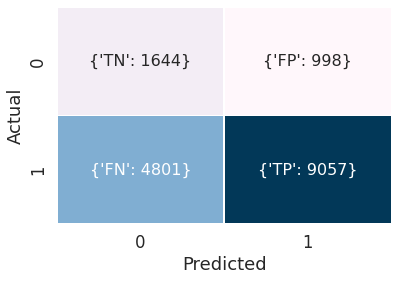

****************************************************************************************************
**************************************************************************************************** 


 The confusion matrix of model with TFIDF vectorization
************************************************************
      0     1
0  1518  1124
1  4595  9263




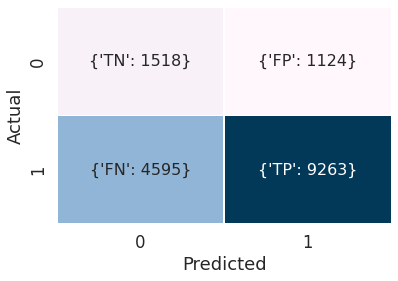

In [ ]:
print (" The confusion matrix of model with BOW vectorization")
print("**"*30)
best_t = find_best_threshold(train_thresholds_BOW, train_fpr_BOW, train_tpr_BOW)
CF_MAT_BOW=confusion_matrix(y_test, predict_with_best_t(y_test_pred_BOW, best_t))
plot_CF_MAT(CF_MAT_BOW)

print("**"*50)
print("**"*50,"\n\n")


print (" The confusion matrix of model with TFIDF vectorization")
print("**"*30)
best_t = find_best_threshold(train_thresholds_TFIDF, train_fpr_TFIDF, train_tpr_TFIDF)
CF_MAT_TFIDF=confusion_matrix(y_test, predict_with_best_t(y_test_pred_TFIDF, best_t))
plot_CF_MAT(CF_MAT_TFIDF)

In [ ]:
def extract_feature_names(n,d,f1,f2,f3,f4,f5,f6,prob_val):
    print('The top ',n,' features are --')
    print('**'*50)
    for i in range(n):
        if d[i] < 5000:
            print(i+1 ,": feature belongs to the ESSAY feature in the data with",prob_val[d[i]],'probability, and the feature name after_vectorising is,',f1[d[i]])
        elif d[i] >= 5000 and d[i]<5051:
            print(i+1 ,": feature belongs to the SCHOOL_STATE feature in the data with",prob_val[d[i]],'probability, and the feature name after_vectorising is,',f2[d[i]-5000])
        elif d[i] >= 5051 and d[i]<5056:
            print(i+1 ,": feature belongs to the TEACHER_PREFIX feature in the data with",prob_val[d[i]],'probability, and the feature name after_vectorising is,',f3[d[i]-5051])
        elif d[i] >= 5056 and d[i]<5060:
            print(i+1 ,": feature belongs to the PROJECT_GRADE_CATEGORY feature in the data with",prob_val[d[i]],'probability, and the feature name after_vectorising is,',f4[d[i]-5056])
        elif d[i] >= 5060 and d[i]<5069:
            print(i+1 ,": feature belongs to the CLEAN_CATEGORIES feature in the data with",prob_val[d[i]],'probability, and the feature name after_vectorising is,',f5[d[i]-5060])
        elif d[i] >= 5069 and d[i]<5099:
            print(i+1 ,": feature belongs to the CLEAN_SUB_CATEGORIES feature in the data with",prob_val[d[i]],'probability, and the feature name after_vectorising is,',f6[d[i]-5069])
        elif d[i] == 5099:
            print(i+1 ,": feature belongs to the PRICE feature in the data with",prob_val[d[i]],'probability ')
        else:
            print(i+1 ,": feature belongs to the PRICE feature in the data with",prob_val[d[i]],'probability ')
        
    print('**'*50)

In [ ]:
from numpy import argsort
prob_val = abs(model.feature_log_prob_[1])
feature_index=np.argsort(-prob_val)
extract_feature_names(20,feature_index,essay_feature_TF,school_state_feature_TF,teacher_prefix_feature_TF,project_grade_category_feature_TF,clean_categories_feature_TF,clean_subcategories_feature_TF,prob_val)


The top  20  features are --
****************************************************************************************************
1 : feature belongs to the CLEAN_SUB_CATEGORIES feature in the data with 13.463880316834091 probability, and the feature name after_vectorising is, warmth
2 : feature belongs to the CLEAN_SUB_CATEGORIES feature in the data with 13.463880316834091 probability, and the feature name after_vectorising is, care_hunger
3 : feature belongs to the CLEAN_CATEGORIES feature in the data with 13.460557830730663 probability, and the feature name after_vectorising is, warmth
4 : feature belongs to the CLEAN_CATEGORIES feature in the data with 13.460557830730663 probability, and the feature name after_vectorising is, care_hunger
5 : feature belongs to the TEACHER_PREFIX feature in the data with 12.404036693629259 probability, and the feature name after_vectorising is, dr
6 : feature belongs to the ESSAY feature in the data with 10.674056561609104 probability, and the featu

<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

In [ ]:
#Summarize your assignment work here in a few points, and also compare the final models (from set 1 and set 2), in terms of optimal hyperparameter value 'alpha', training AUC and test AUC scores.
# You can either use a pretty table or any other tabular structure.
# Reference Link for Pretty table:  https://pypi.org/project/prettytable/

In [ ]:
from prettytable import PrettyTable

x = PrettyTable(["Vectorization","Model", "Hyper-parameter tuning", "Hyper-parameter" ,"AUC_SCORE"])
x.add_row([" BOW ", "MultinomialNB","GridSearchCV", best_alpha_bow, AUC_BOW])
x.add_row([" TFIDF ","MultinomialNB", "GridSearchCV", best_alpha_tfidf, AUC_TFIDF])
print(x)

+---------------+---------------+------------------------+-----------------+--------------------+
| Vectorization |     Model     | Hyper-parameter tuning | Hyper-parameter |     AUC_SCORE      |
+---------------+---------------+------------------------+-----------------+--------------------+
|      BOW      | MultinomialNB |      GridSearchCV      |       0.01      | 0.6847448392143127 |
|     TFIDF     | MultinomialNB |      GridSearchCV      |      0.0001     | 0.6682520578302102 |
+---------------+---------------+------------------------+-----------------+--------------------+
